# 1. Imports

In [89]:
import sys
!{sys.executable} -m pip install xgboost
import numpy as np 
import pandas as pd
import nltk
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
import random
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import xgboost as xgb
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.2)
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vishwa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vishwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vishwa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
train = pd.read_csv("./help-boost-our-online-reach/train_data.csv")
test = pd.read_csv("./help-boost-our-online-reach/test_data.csv")
print("Train shape : ",train.shape,"\tTest shape : ", test.shape)

Train shape :  (5916, 27) 	Test shape :  (1479, 26)


In [23]:
test['label'] = 2
test['indicator'] = 0
train['indicator'] = 1
train_df = pd.concat([test,train])

In [24]:
train_df.head()

,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,id,label,indicator
0,http://www.ocweekly.com/2013-04-11/news/deport...,"{""url"":""ocweekly 2013 04 11 news deported mexi...",sports,0.300004,2.307692,0.424749,0.190635,0.036789,0.020067,0.439444,...,23,0,8670,299,9,0.397993,0.098242,7172,2,0
1,http://www.youbeauty.com/nutrition/galleries/1...,"{""title"":""10 Exotic Fruits Vegetables 10 exoti...",science_technology,0.625228,1.712500,0.492063,0.301587,0.005291,0.000000,0.488178,...,26,0,3800,189,6,0.137566,0.089463,2687,2,0
2,http://www.you-made-that.com/skinny-german-cho...,"{""title"":""Skinny German Chocolate Cookies "",""b...",?,?,1.400000,0.207547,0.018868,0.000000,0.000000,0.513166,...,12,0,2253,53,4,0.132075,0.070922,6990,2,0
3,http://drpullen.com/carpediem/,"{""title"":""Carpe Diem DrPullen com Medical and ...",?,?,1.600000,0.303030,0.000000,0.000000,0.000000,0.461538,...,6,0,3266,33,1,0.060606,0.100000,5639,2,0
4,http://bradcolbow.com/archive/view/the_brads_t...,"{""title"":""Brad Colbow Independent Web Designer...",computer_internet,0.85,3.967213,0.596330,0.449541,0.431193,0.422018,0.505411,...,7,0,13721,109,9,0.027523,0.144509,2701,2,0


# 2.EDA 

## 2.1 checking null values

In [25]:
train_df.isna().sum()

url                           0
webpageDescription            0
alchemy_category              0
alchemy_category_score        0
avgLinkWordLength             0
AvglinkWithOneCommonWord      0
AvglinkWithTwoCommonWord      0
AvglinkWithThreeCommonWord    0
AvglinkWithFourCommonWord     0
redundancyMeasure             0
embedRatio                    0
framebased                    0
frameTagRatio                 0
domainLink                    0
tagRatio                      0
imageTagRatio                 0
isNews                        0
lengthyDomain                 0
hyperlinkToAllWordsRatio      0
isFrontPageNews               0
alphanumCharCount             0
linksCount                    0
wordCount                     0
parametrizedLinkRatio         0
spellingErrorsRatio           0
id                            0
label                         0
indicator                     0
dtype: int64

In [26]:
(train_df == "?").sum()

url                              0
webpageDescription               0
alchemy_category              2342
alchemy_category_score        2342
avgLinkWordLength                0
AvglinkWithOneCommonWord         0
AvglinkWithTwoCommonWord         0
AvglinkWithThreeCommonWord       0
AvglinkWithFourCommonWord        0
redundancyMeasure                0
embedRatio                       0
framebased                       0
frameTagRatio                    0
domainLink                       0
tagRatio                         0
imageTagRatio                    0
isNews                        2843
lengthyDomain                    0
hyperlinkToAllWordsRatio         0
isFrontPageNews               1248
alphanumCharCount                0
linksCount                       0
wordCount                        0
parametrizedLinkRatio            0
spellingErrorsRatio              0
id                               0
label                            0
indicator                        0
dtype: int64

In [27]:
train_df['alchemy_category'].value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

<AxesSubplot:>

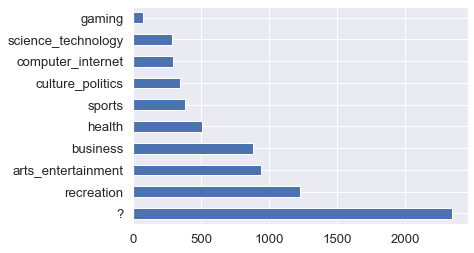

In [28]:
train_df['alchemy_category'].value_counts()[:10].plot(kind='barh')

In [29]:
# replacing ? values with random value
train_df['alchemy_category'] = train_df['alchemy_category'].replace(to_replace ="?",value =random.choice(train_df['alchemy_category'].values.tolist()))
train_df['alchemy_category']

0                   sports
1       science_technology
2       arts_entertainment
3       arts_entertainment
4        computer_internet
               ...        
5911              business
5912             law_crime
5913              business
5914            recreation
5915            recreation
Name: alchemy_category, Length: 7395, dtype: object

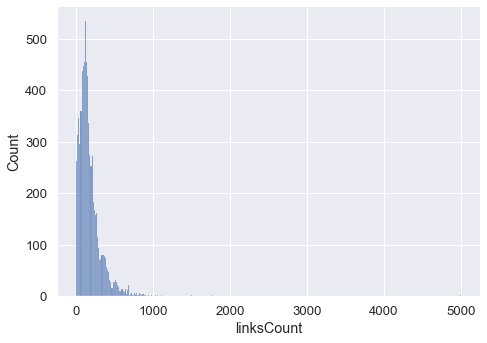

In [30]:
sns.displot(data=train_df,x="linksCount",kind="hist",aspect=1.4)

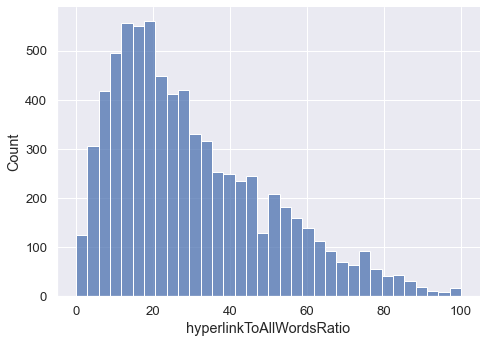

In [31]:
sns.displot(data=train_df,x="hyperlinkToAllWordsRatio",kind="hist",aspect=1.4)

In [32]:
train_df['alchemy_category_score'] = train_df['alchemy_category_score'].replace(to_replace ="?",value = np.NaN)
train_df['alchemy_category_score'] = train_df['alchemy_category_score'].astype('float')

In [33]:
print('median: ',train_df['alchemy_category_score'].median())
print('mean : ',train_df['alchemy_category_score'].mean())

median:  0.625616
mean :  0.6033343166237869


In [34]:
train_df['alchemy_category_score'].fillna(train_df['alchemy_category_score'].mean(), inplace=True)

In [35]:
train_df['isNews'].mode() 

0    1
dtype: object

In [36]:
train_df['isFrontPageNews'].mode()

0    0
dtype: object

In [37]:
train_df['isFrontPageNews'] = train_df['isFrontPageNews'].replace(to_replace ="?",value =0)
train_df['isNews'] = train_df['isNews'].replace(to_replace ="?",value =1)

In [38]:
train_df['isNews']=train_df['isNews'].astype('float')
train_df['isFrontPageNews']=train_df['isFrontPageNews'].astype('float')

In [39]:
(train_df == "?").sum()

url                           0
webpageDescription            0
alchemy_category              0
alchemy_category_score        0
avgLinkWordLength             0
AvglinkWithOneCommonWord      0
AvglinkWithTwoCommonWord      0
AvglinkWithThreeCommonWord    0
AvglinkWithFourCommonWord     0
redundancyMeasure             0
embedRatio                    0
framebased                    0
frameTagRatio                 0
domainLink                    0
tagRatio                      0
imageTagRatio                 0
isNews                        0
lengthyDomain                 0
hyperlinkToAllWordsRatio      0
isFrontPageNews               0
alphanumCharCount             0
linksCount                    0
wordCount                     0
parametrizedLinkRatio         0
spellingErrorsRatio           0
id                            0
label                         0
indicator                     0
dtype: int64

In [40]:
train_df.head()
#pd.set_option("display.max_columns",None)

,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,id,label,indicator
0,http://www.ocweekly.com/2013-04-11/news/deport...,"{""url"":""ocweekly 2013 04 11 news deported mexi...",sports,0.300004,2.307692,0.424749,0.190635,0.036789,0.020067,0.439444,...,23,0.0,8670,299,9,0.397993,0.098242,7172,2,0
1,http://www.youbeauty.com/nutrition/galleries/1...,"{""title"":""10 Exotic Fruits Vegetables 10 exoti...",science_technology,0.625228,1.712500,0.492063,0.301587,0.005291,0.000000,0.488178,...,26,0.0,3800,189,6,0.137566,0.089463,2687,2,0
2,http://www.you-made-that.com/skinny-german-cho...,"{""title"":""Skinny German Chocolate Cookies "",""b...",arts_entertainment,0.603334,1.400000,0.207547,0.018868,0.000000,0.000000,0.513166,...,12,0.0,2253,53,4,0.132075,0.070922,6990,2,0
3,http://drpullen.com/carpediem/,"{""title"":""Carpe Diem DrPullen com Medical and ...",arts_entertainment,0.603334,1.600000,0.303030,0.000000,0.000000,0.000000,0.461538,...,6,0.0,3266,33,1,0.060606,0.100000,5639,2,0
4,http://bradcolbow.com/archive/view/the_brads_t...,"{""title"":""Brad Colbow Independent Web Designer...",computer_internet,0.850000,3.967213,0.596330,0.449541,0.431193,0.422018,0.505411,...,7,0.0,13721,109,9,0.027523,0.144509,2701,2,0


## 2.2 One-Hot encoding

In [41]:
#one-hot encoding for categorical data 
column_names_to_one_hot = ["alchemy_category"]
train_df = pd.get_dummies(train_df, columns=column_names_to_one_hot)
train_df.head()

,url,webpageDescription,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,embedRatio,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,http://www.ocweekly.com/2013-04-11/news/deport...,"{""url"":""ocweekly 2013 04 11 news deported mexi...",0.300004,2.307692,0.424749,0.190635,0.036789,0.020067,0.439444,0.0,...,0,0,0,0,0,0,0,1,0,0
1,http://www.youbeauty.com/nutrition/galleries/1...,"{""title"":""10 Exotic Fruits Vegetables 10 exoti...",0.625228,1.712500,0.492063,0.301587,0.005291,0.000000,0.488178,0.0,...,0,0,0,0,0,0,1,0,0,0
2,http://www.you-made-that.com/skinny-german-cho...,"{""title"":""Skinny German Chocolate Cookies "",""b...",0.603334,1.400000,0.207547,0.018868,0.000000,0.000000,0.513166,0.0,...,0,0,0,0,0,0,0,0,0,0
3,http://drpullen.com/carpediem/,"{""title"":""Carpe Diem DrPullen com Medical and ...",0.603334,1.600000,0.303030,0.000000,0.000000,0.000000,0.461538,0.0,...,0,0,0,0,0,0,0,0,0,0
4,http://bradcolbow.com/archive/view/the_brads_t...,"{""title"":""Brad Colbow Independent Web Designer...",0.850000,3.967213,0.596330,0.449541,0.431193,0.422018,0.505411,0.0,...,0,0,0,0,0,0,0,0,0,0


# 2.3 Outlier removal

In [42]:
#here we are using IQR for outlier removal as there are many outliers
#function to plot outliers
def outlierPlot(p):
    sns.boxplot(x=p)
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.distplot(p)

#function for getting upper and lower limit
def upperLower(dfcolumnName):
    percentile25 = dfcolumnName.quantile(0.25)
    percentile75 = dfcolumnName.quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    return upper_limit,lower_limit

#functopn for caaping i.e removing outlieers
def capping(df,upper_limit,lower_limit,column_name):
    new_df_cap = df.copy()
    new_df_cap[column_name] = np.where(
    new_df_cap[column_name] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap[column_name] < lower_limit,
        lower_limit,
        new_df_cap[column_name]
        )
    )
    return new_df_cap[column_name]

In [43]:
train_df['alchemy_category_score'].unique()

array([0.300004  , 0.625228  , 0.60333432, ..., 0.502369  , 0.371516  ,
       0.56931   ])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


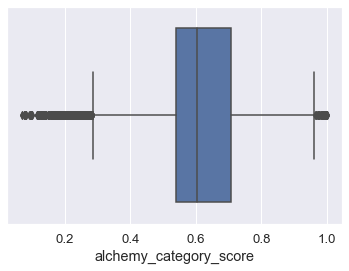

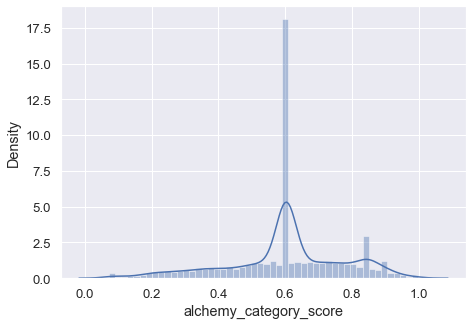

In [44]:
outlierPlot(train_df['alchemy_category_score'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


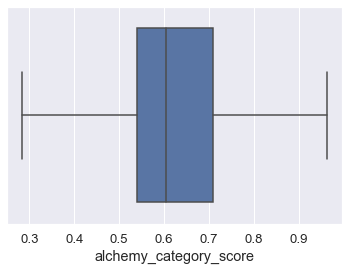

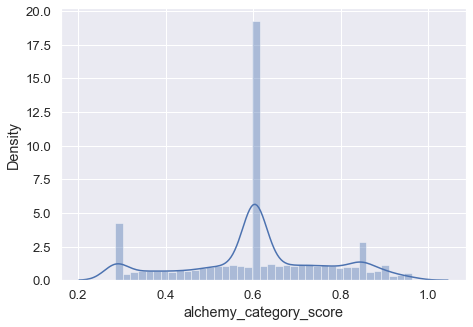

In [45]:
upper_limit,lower_limit = upperLower(train_df['alchemy_category_score'])
train_df['alchemy_category_score'] = capping(train_df,upper_limit,lower_limit,'alchemy_category_score')
outlierPlot(train_df['alchemy_category_score'])

In [46]:
train_df['avgLinkWordLength'].unique()

array([2.30769231, 1.7125    , 1.4       , ..., 3.51470588, 1.43087558,
       2.44086021])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


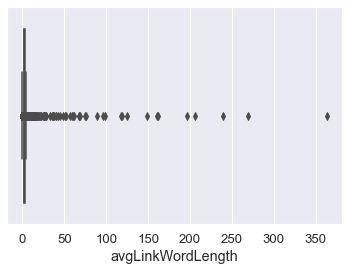

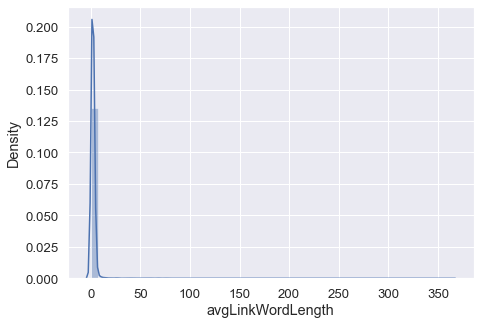

In [47]:
outlierPlot(train_df['avgLinkWordLength'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


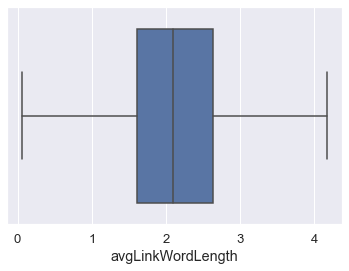

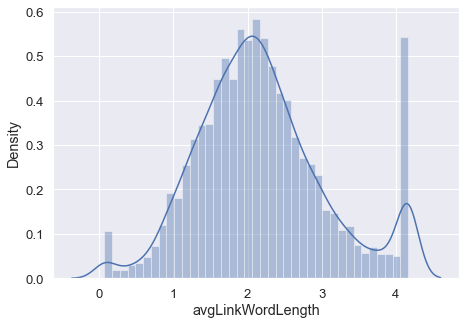

In [48]:
upper_limit,lower_limit = upperLower(train_df['avgLinkWordLength'])
train_df['avgLinkWordLength'] = capping(train_df,upper_limit,lower_limit,'avgLinkWordLength')
outlierPlot(train_df['avgLinkWordLength'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


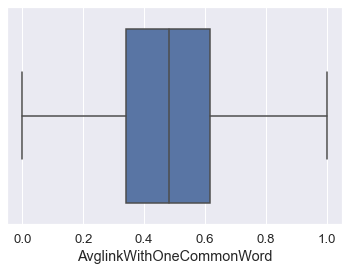

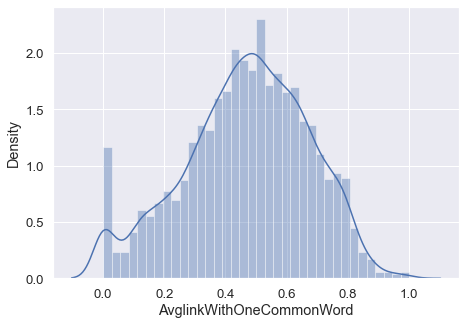

In [49]:
outlierPlot(train_df['AvglinkWithOneCommonWord'])
#no outliers found

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


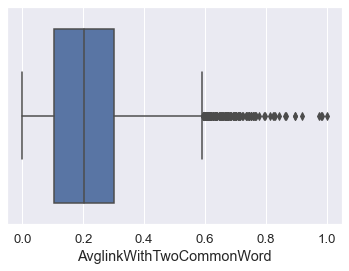

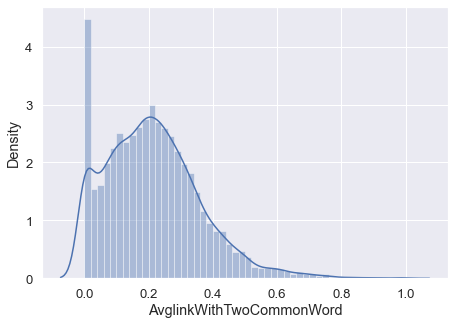

In [50]:
outlierPlot(train_df['AvglinkWithTwoCommonWord'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


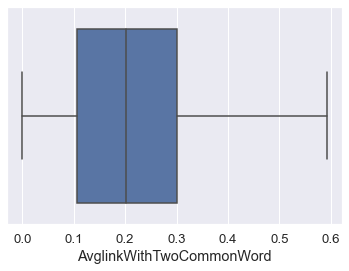

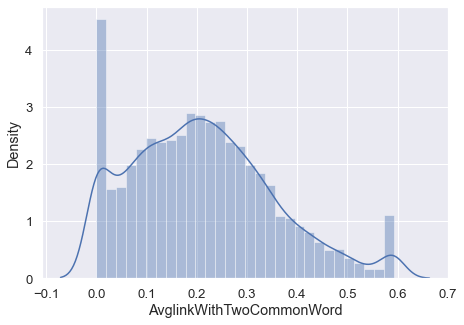

In [51]:

upper_limit,lower_limit = upperLower(train_df['AvglinkWithTwoCommonWord'])
train_df['AvglinkWithTwoCommonWord'] = capping(train_df,upper_limit,lower_limit,'AvglinkWithTwoCommonWord')
outlierPlot(train_df['AvglinkWithTwoCommonWord'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


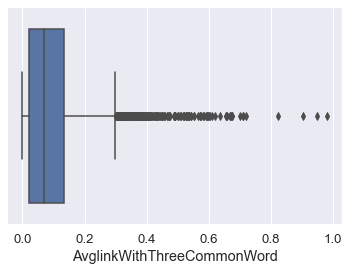

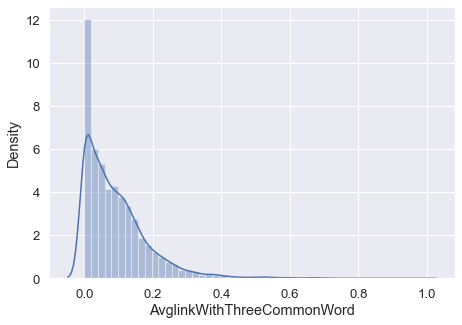

In [52]:
outlierPlot(train_df['AvglinkWithThreeCommonWord'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


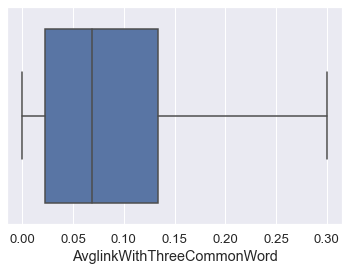

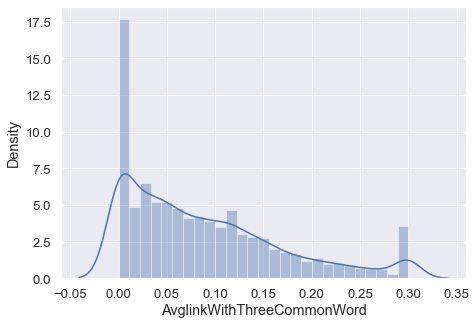

In [53]:

upper_limit,lower_limit = upperLower(train_df['AvglinkWithThreeCommonWord'])
train_df['AvglinkWithThreeCommonWord'] = capping(train_df,upper_limit,lower_limit,'AvglinkWithThreeCommonWord')
outlierPlot(train_df['AvglinkWithThreeCommonWord'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


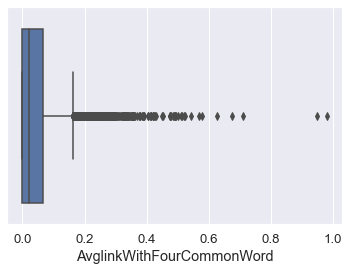

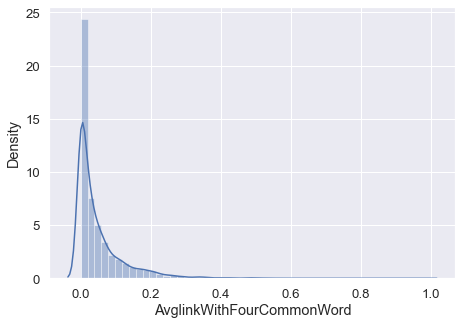

In [54]:
outlierPlot(train_df['AvglinkWithFourCommonWord'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


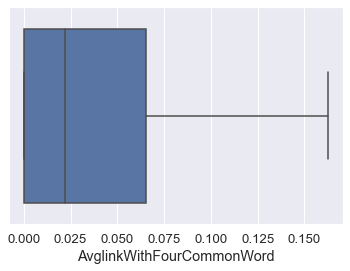

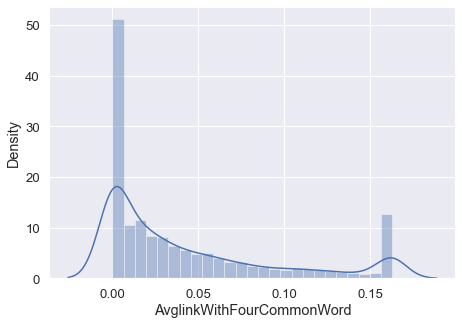

In [55]:
upper_limit,lower_limit = upperLower(train_df['AvglinkWithFourCommonWord'])
train_df['AvglinkWithFourCommonWord'] = capping(train_df,upper_limit,lower_limit,'AvglinkWithFourCommonWord')
outlierPlot(train_df['AvglinkWithFourCommonWord'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


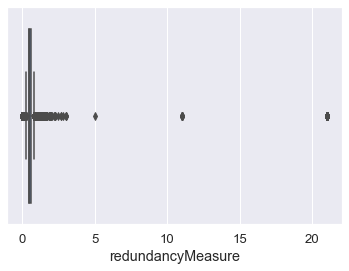

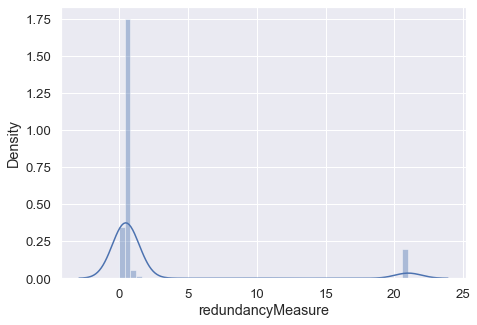

In [56]:
outlierPlot(train_df['redundancyMeasure'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


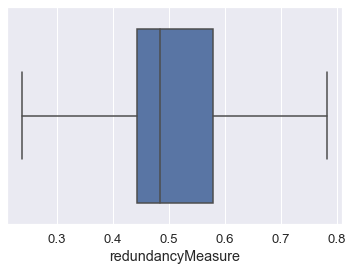

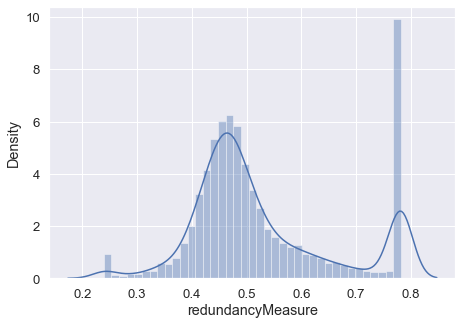

In [57]:
upper_limit,lower_limit = upperLower(train_df['redundancyMeasure'])
train_df['redundancyMeasure'] = capping(train_df,upper_limit,lower_limit,'redundancyMeasure')
outlierPlot(train_df['redundancyMeasure'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


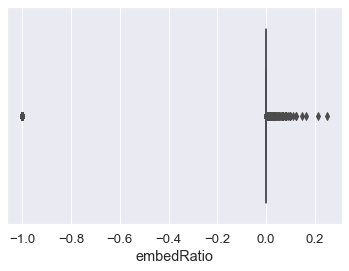

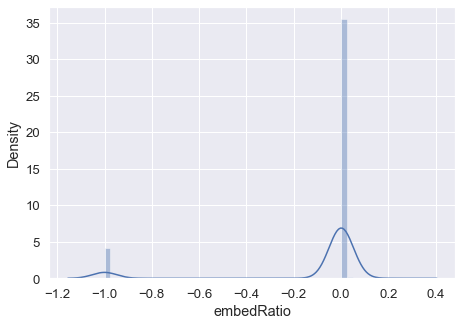

In [58]:
outlierPlot(train_df['embedRatio'])
#train_df['embedRatio'].unique()

## 2.4 dropping column with all 0 values

In [59]:
train_df['framebased'].unique()

array([0], dtype=int64)

In [60]:
train_df.drop(axis="columns", labels="framebased", inplace=True)

In [61]:
train_df.shape

(7395, 39)

# 3.NLP Preprocessing

In [62]:
m = train_df['url'].str.extract('(?<=http://)(.*?)(?=/)|(?<=https://)(.*?)(?=/)')
m = m[0].fillna(m[1]).fillna(train_df['url'])
train_df['url'] = m

In [63]:
train_df.head()

,url,webpageDescription,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,embedRatio,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,www.ocweekly.com,"{""url"":""ocweekly 2013 04 11 news deported mexi...",0.300004,2.307692,0.424749,0.190635,0.036789,0.020067,0.439444,0.0,...,0,0,0,0,0,0,0,1,0,0
1,www.youbeauty.com,"{""title"":""10 Exotic Fruits Vegetables 10 exoti...",0.625228,1.712500,0.492063,0.301587,0.005291,0.000000,0.488178,0.0,...,0,0,0,0,0,0,1,0,0,0
2,www.you-made-that.com,"{""title"":""Skinny German Chocolate Cookies "",""b...",0.603334,1.400000,0.207547,0.018868,0.000000,0.000000,0.513166,0.0,...,0,0,0,0,0,0,0,0,0,0
3,drpullen.com,"{""title"":""Carpe Diem DrPullen com Medical and ...",0.603334,1.600000,0.303030,0.000000,0.000000,0.000000,0.461538,0.0,...,0,0,0,0,0,0,0,0,0,0
4,bradcolbow.com,"{""title"":""Brad Colbow Independent Web Designer...",0.850000,3.967213,0.596330,0.449541,0.300000,0.162662,0.505411,0.0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
print(train_df['webpageDescription'])

0       {"url":"ocweekly 2013 04 11 news deported mexi...
1       {"title":"10 Exotic Fruits Vegetables 10 exoti...
2       {"title":"Skinny German Chocolate Cookies ","b...
3       {"title":"Carpe Diem DrPullen com Medical and ...
4       {"title":"Brad Colbow Independent Web Designer...
                              ...                        
5911    {"title":"Diamonds Are A Girl s Best Hair Remo...
5912    {"title":"Man arrested for wearing POLICE t sh...
5913    {"title":"Cake Batter Truffles The Girl Who At...
5914    {"title":"Avocado Recipes California Avocado C...
5915    {"title":"Driving while inTEXTicated My Though...
Name: webpageDescription, Length: 7395, dtype: object


In [65]:
train_df['webpageDescription'].replace(to_replace=r'"title":', value="",inplace=True,regex=True)
train_df['webpageDescription'].replace(to_replace=r'"url":',value="",inplace=True,regex=True)
train_df['webpageDescription'].replace(to_replace=r'"body":',value="",inplace=True,regex=True)
train_df['webpageDescription'].replace(to_replace=r'{|}',value="",inplace=True,regex=True)

In [66]:
train_df.head()

,url,webpageDescription,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,embedRatio,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,www.ocweekly.com,"""ocweekly 2013 04 11 news deported mexicans ba...",0.300004,2.307692,0.424749,0.190635,0.036789,0.020067,0.439444,0.0,...,0,0,0,0,0,0,0,1,0,0
1,www.youbeauty.com,"""10 Exotic Fruits Vegetables 10 exotic fruits ...",0.625228,1.712500,0.492063,0.301587,0.005291,0.000000,0.488178,0.0,...,0,0,0,0,0,0,1,0,0,0
2,www.you-made-that.com,"""Skinny German Chocolate Cookies "",""These litt...",0.603334,1.400000,0.207547,0.018868,0.000000,0.000000,0.513166,0.0,...,0,0,0,0,0,0,0,0,0,0
3,drpullen.com,"""Carpe Diem DrPullen com Medical and Health Bl...",0.603334,1.600000,0.303030,0.000000,0.000000,0.000000,0.461538,0.0,...,0,0,0,0,0,0,0,0,0,0
4,bradcolbow.com,"""Brad Colbow Independent Web Designer Illustra...",0.850000,3.967213,0.596330,0.449541,0.300000,0.162662,0.505411,0.0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
wordnet = WordNetLemmatizer()
from nltk.corpus import stopwords
def textCleaning(df,column_name):
    cleanList = list()
    lines = df[column_name].values.tolist()
    for text in lines:
        text = text.lower()
        words = word_tokenize(text)
        stop_words = set(stopwords.words("english"))
        words = [w for w in words if not w in stop_words]
        words = [w for w in words if w.isalpha()]
        words = ' '.join(words)
        cleanList.append(words)
    return cleanList

In [68]:
webpageDescription = textCleaning(train_df,"webpageDescription")
webpageDescription[0:20]

['ocweekly news deported mexicans bastanchury ranch fullerton orange county lost mexicans bastanchury ranch page news orange county lost mexicans bastanchury ranch decades later long federal authorities deported last students arletta kelly still remembered cactus group women took ranch americanization classes morales cute toddler bottom left related content kelly worked americanization teacher citrus camps orange county tasked schooling mexican immigrants art good citizenship day taught women sew cook american meals like casseroles pies night michigan native recited basic english phrases audiences men could use work bounced across colonias worker colonies north county la habra placentia anaheim fullerton kelly eventually spent time mexicans bastanchury ranch rolling acres constitutes exclusive neighborhoods northwest fullerton sunny hills valencia mesa others parts brea la habra area day winding roads visible horse stables dramatic valleys stretches untouched california landscape feels

### TF-IDF vectorization

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
TV = TfidfVectorizer(min_df=1)  

In [70]:
def chkNonzero(df,col):
    for i in df[col+'_0']:
      if(i != 0.00):
        print(i)

In [71]:
X = TV.fit_transform(webpageDescription).toarray()
arrayCols = len(X[0])
print('Shape : ',np.shape(X),'\n')
columns = [f'webpageDescription_{num}' for num in range(arrayCols)]
df_webpageDescription =  pd.DataFrame(X, columns=columns)
chkNonzero(df_webpageDescription,'webpageDescription')

Shape :  (7395, 78185) 

0.09084697249475217
0.03645746146791631
0.015283500466449877
0.02585804919241792
0.017480213818118345
0.012818520847319489
0.07530509381003037
0.002596059771451365
0.026754939444007152
0.08208210230742576
0.03552442589151326
0.05913979252219913
0.29206593872035475
0.018359562050246424
0.03264670223163985
0.0025915282530577324
0.04105453632902743


In [72]:
df_webpageDescription.shape

(7395, 78185)

# 4.feature scaling and joining vectorize data with other feature columns

In [73]:
train_df.head()

,url,webpageDescription,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,embedRatio,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,www.ocweekly.com,"""ocweekly 2013 04 11 news deported mexicans ba...",0.300004,2.307692,0.424749,0.190635,0.036789,0.020067,0.439444,0.0,...,0,0,0,0,0,0,0,1,0,0
1,www.youbeauty.com,"""10 Exotic Fruits Vegetables 10 exotic fruits ...",0.625228,1.712500,0.492063,0.301587,0.005291,0.000000,0.488178,0.0,...,0,0,0,0,0,0,1,0,0,0
2,www.you-made-that.com,"""Skinny German Chocolate Cookies "",""These litt...",0.603334,1.400000,0.207547,0.018868,0.000000,0.000000,0.513166,0.0,...,0,0,0,0,0,0,0,0,0,0
3,drpullen.com,"""Carpe Diem DrPullen com Medical and Health Bl...",0.603334,1.600000,0.303030,0.000000,0.000000,0.000000,0.461538,0.0,...,0,0,0,0,0,0,0,0,0,0
4,bradcolbow.com,"""Brad Colbow Independent Web Designer Illustra...",0.850000,3.967213,0.596330,0.449541,0.300000,0.162662,0.505411,0.0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#dropping unrelated columns
train_df.drop(axis="columns", labels="url", inplace=True)
train_df.drop(axis="columns", labels="webpageDescription", inplace=True)
train_df.drop(axis="columns", labels="label", inplace=True)
train_df.drop(axis="columns", labels="indicator", inplace=True)
train_df.drop(axis="columns", labels="id", inplace=True)

In [75]:
train_df.head()

,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,embedRatio,frameTagRatio,domainLink,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,0.300004,2.307692,0.424749,0.190635,0.036789,0.020067,0.439444,0.0,0.029235,0,...,0,0,0,0,0,0,0,1,0,0
1,0.625228,1.712500,0.492063,0.301587,0.005291,0.000000,0.488178,0.0,0.042431,0,...,0,0,0,0,0,0,1,0,0,0
2,0.603334,1.400000,0.207547,0.018868,0.000000,0.000000,0.513166,0.0,0.059937,0,...,0,0,0,0,0,0,0,0,0,0
3,0.603334,1.600000,0.303030,0.000000,0.000000,0.000000,0.461538,0.0,0.150327,0,...,0,0,0,0,0,0,0,0,0,0
4,0.850000,3.967213,0.596330,0.449541,0.300000,0.162662,0.505411,0.0,0.007825,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
#robust scaling is used to handle outliers
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
train_df = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)

In [77]:
train_df.head()

,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,embedRatio,frameTagRatio,domainLink,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,-1.789332,0.214023,-0.205378,-0.060690,-0.286543,-0.033126,-0.326195,0.0,-0.367895,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.129150,-0.366432,0.038308,0.509063,-0.570028,-0.341540,0.033176,0.0,-0.074371,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000000,-0.671195,-0.991674,-0.942739,-0.617647,-0.341540,0.217434,0.0,0.315022,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,-0.476147,-0.646014,-1.039629,-0.617647,-0.341540,-0.163269,0.0,2.325633,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.455070,1.832454,0.415766,1.268827,2.082353,2.158460,0.160251,0.0,-0.844149,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
train_df.reset_index(inplace=True, drop=True)

In [79]:
horizontal_concat = pd.concat([df_webpageDescription,train_df], axis=1)

In [80]:
horizontal_concat.shape

(7395, 78219)

In [81]:
horizontal_concat.head()

,webpageDescription_0,webpageDescription_1,webpageDescription_2,webpageDescription_3,webpageDescription_4,webpageDescription_5,webpageDescription_6,webpageDescription_7,webpageDescription_8,webpageDescription_9,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5.Train test split

In [84]:
#X_test_df = df_webpageDescription.iloc[:1479,:]
#X_train_df  = df_webpageDescription.iloc[1479:,:]


X_test_df = horizontal_concat.iloc[:1479,:]
X_train_df  = horizontal_concat.iloc[1479:,:]
print("Shape of new dataframes - {} , {}".format(X_test_df.shape, X_train_df.shape))

Shape of new dataframes - (1479, 78185) , (5916, 78185)


In [85]:
Y_train_df = train['label']
print("Y_train_df shape : ",Y_train_df.shape)

Y_train_df shape :  (5916,)


# 6.Model

## 6.1 logistic regression

In [87]:
"""using logistic regression"""
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter = 1500)

# fit the model with data
logreg.fit(X_train_df, Y_train_df)

#[:,1] this is applied to take positive probablities
y_pred__test_logreg=logreg.predict_proba(X_test_df)[:,1]
y_pred_train_logreg=logreg.predict_proba(X_train_df)[:,1]

In [73]:
test["label"] = y_pred_logreg
submission_log = test[["id","label"]]
submission_log.to_csv("bowtfid_mindf1_scaled_allcolumns_1500itnolgbfs_submission201221.csv",index=False)

## 6.2 SVM

In [56]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_df, Y_train_df)



SVC(kernel='linear', probability=True)

In [57]:
#Predict the response for test dataset
y_pred = clf.predict_proba(X_test_df)[:,1]

In [58]:
test["label"] = y_pred_logreg
submission_log = test[["id","label"]]
submission_log.to_csv("bowtfid_mindf1_scaled_allcolumns_svm_submission008.csv",index=False)

## 6.3 Random forest

In [245]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier

In [246]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 1000) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train_df, Y_train_df)
 
# performing predictions on the test dataset
y_pred = clf.predict_proba(X_test_df)[:,1]

In [247]:
test["label"] = y_pred
submission_log = test[["id","label"]]
submission_log.to_csv("bowtfid_mindf1_scaled_allcolumns_randomforest_submission016.csv",index=False)

## 6.4 Simple Xgboost classifier

In [ ]:
# Fitting a simple xgboost on tf-idf
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(X_train_df, Y_train_df)

C:\Users\Vishwa\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:16:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
y_pred_xgboost= clf.predict_proba(X_test_df)[:,1]

In [ ]:
test["label"] = y_pred_xgboost
submission_log = test[["id","label"]]
submission_log.to_csv("bowtfid_mindf1_scaled_allcolumns_xgboost_submission201221.csv",index=False)